# Prosper Loan Dataset Exploration 
## by Oppong Samuel Addo

## Introduction
> This is an exploration of the prosper loan dataset which consists of 113937 rows and 81 columns(financial variables). This dataset contains the loan data of loan applicants and can be downloaded [here](https://www.kaggle.com/datasets/nurudeenabdulsalaam/prosper-loan-dataset) and the data dictionary(definition of variables) can be read [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
base_color = sns.color_palette()[0]
import zipfile
%matplotlib inline

In [2]:
# extract dataset after download straight from kaggle

files = zipfile.ZipFile("prosper-loan-dataset.zip",'r')
files.extractall("prosper_loan_dataset")
files.close()

In [3]:
df = pd.read_csv('prosper_loan_dataset/prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# get the names of columns for easy reference.

df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
df['ListingKey'].isnull().sum()

0

In [7]:
df.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99]).round(3)

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.000,113937.000,113912.000,113937.000,113937.000,84853.000,84853.000,84853.000,84853.000,84853.000,...,113937.000,113937.000,113937.000,113937.000,113937.000,113937.000,113937.000,113937.000,113937.000,113937.000
mean,627885.693,40.830,0.219,0.193,0.183,0.169,0.080,0.096,4.072,5.950,...,-54.726,-14.243,700.446,681.420,25.143,0.999,0.048,0.023,16.551,80.475
std,328076.236,10.436,0.080,0.075,0.075,0.068,0.047,0.030,1.673,2.377,...,60.675,109.233,2388.514,2357.167,275.658,0.018,0.332,0.232,294.545,103.239
min,4.000,12.000,0.007,0.000,-0.010,-0.183,0.005,-0.183,1.000,1.000,...,-664.870,-9274.750,-94.200,-954.550,0.000,0.700,0.000,0.000,0.000,1.000
25%,400919.000,36.000,0.156,0.134,0.124,0.116,0.042,0.074,3.000,4.000,...,-73.180,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,2.000
50%,600554.000,36.000,0.210,0.184,0.173,0.162,0.072,0.092,4.000,6.000,...,-34.440,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,44.000
75%,892634.000,36.000,0.284,0.250,0.240,0.224,0.112,0.117,5.000,8.000,...,-13.920,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,115.000
95%,1156791.200,60.000,0.358,0.318,0.308,0.290,0.165,0.149,7.000,10.000,...,0.000,0.000,4566.828,4447.512,0.000,1.000,0.000,0.000,0.000,292.000
99%,1221571.760,60.000,0.375,0.350,0.340,0.296,0.183,0.170,7.000,11.000,...,0.000,0.000,13122.044,12968.304,693.839,1.000,1.000,1.000,149.759,466.000
max,1255725.000,60.000,0.512,0.498,0.492,0.320,0.366,0.284,7.000,11.000,...,32.060,0.000,25000.000,25000.000,21117.900,1.012,39.000,33.000,25000.000,1189.000


From the above description, there seems to be missing values since the count of rows for the various columns are not the same. From the data dictionary, most of the missing values are due to the fact that they are not applicable to that rows and so I'll see the best way to handle these missing values in some of the columns in my subsquent assessment.

In [8]:
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

There are many columns with so many missing values in the dataset. Removing them will make our dataset very small and that could be disasterous and could affect other columns during analysis.

Now before working with these variables of interest, we have to make sure that they're in their right data type and format. In the following cells, we're going to convert features into their appropriate data types and formats.

In [9]:
df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

convert the `Term` feature to a categorical column since we only have three(3) unique values, i.e., 12, 36, 60 in the dataset for which every loan belongs to one of these number of months.

In [10]:
term_cat = {
    12:'12 months',
    36:'36 months',
    60:'60 months'
}

df['Term'] = df['Term'].map(term_cat)
df['Term'] = df['Term'].astype('category')

In [11]:
# testing to verify the conversion from int64 to categorical data type.

assert df['Term'].dtype == 'category'

`ListingCategory (numeric)` feature should be converted to a categorical data type with their actual categories and the name renamed into a simple and concise one.

In [12]:
# use the rename method to rename the `ListingCategory (numeric)` variable to `ListingCategory`

df.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

Convert `ListingCategory` to categorical data type using the actual categories as seen in the variable definition file/data dictionary. 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [13]:
Listing_cat_vals = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 
 3 :'Business', 4: 'Personal Loan', 5 :'Student Use', 6: 'Auto', 7:'Other', 
 8: 'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
 11:'Engagement Ring', 12 :'Green Loans', 
 13 :'Household Expenses', 14:'Large Purchases',
 15:'Medical/Dental', 16 :'Motorcycle', 17: 'RV', 
 18 :'Taxes', 19 :'Vacation', 20: 'Wedding Loans'}


df['ListingCategory'] = df['ListingCategory'].map(Listing_cat_vals)


In [14]:
# checking to see if the change was effected


df['ListingCategory'].sample(5)

84006     Debt Consolidation
55109     Debt Consolidation
105482    Debt Consolidation
2192                   Other
75635     Debt Consolidation
Name: ListingCategory, dtype: object

In [15]:
# after mapping the values, it'll be in `object` data type and so we must convert it to categorical data type..bbb

df['ListingCategory'] = df['ListingCategory'].astype('category')

In [16]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
35378,93C5355505136339443BAF2,625427,2012-08-17 09:47:44.950000000,NaN,36 months,Chargedoff,2013-08-27 00:00:00,0.35797,0.3177,0.3077,...,-22.24,0.00,3535.86,3535.86,0.0,1.0,0,0,0.0,31
77399,7005358779847928815E27B,874674,2013-08-20 10:20:49.740000000,NaN,60 months,Current,NaN,0.29341,0.2672,0.2572,...,-19.75,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
42572,4DD3349673743825998AB33,478316,2010-10-05 14:09:33.580000000,NaN,36 months,Completed,2012-02-06 00:00:00,0.23393,0.2000,0.1900,...,-28.53,0.00,0.00,0.00,0.0,1.0,0,0,0.0,3
36408,52D63590298965206B9F22D,901650,2013-09-13 16:05:24.283000000,NaN,36 months,Current,NaN,0.22875,0.1915,0.1815,...,-47.79,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
9539,F39234009954962206F384E,206432,2007-09-25 00:38:25,C,36 months,Chargedoff,2010-06-03 00:00:00,0.16918,0.1620,0.1520,...,-64.97,-242.54,1789.67,1893.65,0.0,1.0,0,0,0.0,64
101281,BC123476945357316446837,448198,2010-02-26 07:17:30.013000000,NaN,36 months,Completed,2010-11-04 00:00:00,0.23456,0.2095,0.1995,...,-8.03,0.00,0.00,0.00,0.0,1.0,0,0,0.0,90
112794,C7AE341345096620750A557,284511,2008-02-26 08:11:16.650000000,HR,36 months,Completed,2010-09-16 00:00:00,0.20210,0.1800,0.1700,...,-16.06,0.00,0.00,0.00,0.0,1.0,0,0,0.0,55
5879,94E934994137103576D5614,484022,2010-11-12 09:08:59.517000000,NaN,36 months,Completed,2011-02-28 00:00:00,0.31053,0.2750,0.2650,...,-5.52,0.00,0.00,0.00,0.0,1.0,0,0,0.0,36
96380,FB9935330247062983E6B3B,542174,2011-12-01 08:18:03.730000000,NaN,36 months,Current,NaN,0.29486,0.2561,0.2461,...,-31.27,0.00,0.00,0.00,0.0,1.0,0,0,0.0,16
35225,0273351357215818507D5A8,503889,2011-04-26 11:20:14.040000000,NaN,12 months,Completed,2012-05-05 00:00:00,0.07431,0.0649,0.0549,...,-38.56,0.00,0.00,0.00,0.0,1.0,0,0,0.0,115


In [17]:
df[['IncomeRange', 'EmploymentStatus']].dtypes

IncomeRange         object
EmploymentStatus    object
dtype: object

After taking another look at the dataframe, it was seen that the `IncomeRange`, `EmploymentStatus`, `Ratings` must be converted to categorical data type..

In [18]:
# convert to categorical data type.
cat_list = ['IncomeRange', 'EmploymentStatus']

for col in cat_list:
    df[col] = df[col].astype('category')

In [19]:
# check to see the change..

df[['IncomeRange', 'EmploymentStatus']].dtypes

IncomeRange         category
EmploymentStatus    category
dtype: object

## Univariate Exploration

#### What is the distribution of Loan Term?

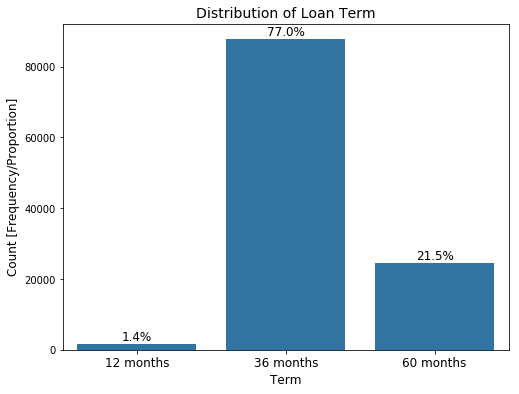

In [20]:
# let's visualize the distribution of the `Term` feature..

n_terms = df['Term'].value_counts().sum()
term_counts = df['Term'].value_counts()


plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Term', color=base_color)
plt.ylabel('Count [Frequency/Proportion]', fontsize=12);
plt.xlabel('Term', fontsize=12);
plt.title('Distribution of Loan Term', fontsize=14)
# get the current tick locations and labels
locs, labels = plt.xticks(fontsize=12) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = term_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_terms)

    # print the annotation just below the top of the bar
    plt.text(loc, count+1000, pct_string, ha = 'center', color = 'black', fontsize=12)

This shows the distribution of loan term in months and it can be derived that, most of the loans given out have `36 months`(3 years) duration to be completed. About 77% of the borrowers are given a term of `36 months`(3 years). Whereas just a little over 21.6% of customers have a loan term of `60 months` i.e., 5 years and the rest being `12 months`.

#### What is the distribution of Loan Interest Rate (what is the most frequent interest rate given on loans)?

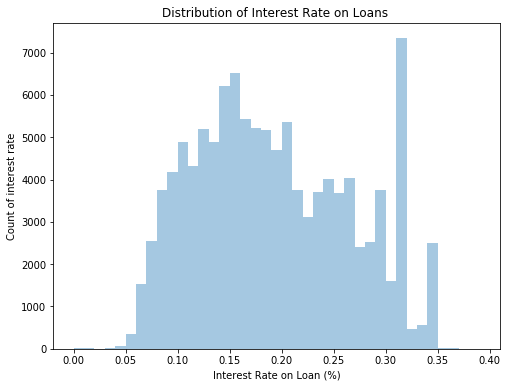

In [21]:
# visualizing the interest rate on the loans
plt.figure(figsize=(8,6))
binsize = np.arange(0,0.4,0.01)
sns.distplot(df['BorrowerRate'], bins=binsize, kde=False, color=base_color, axlabel='Interest Rate on Loan (%)');
plt.title('Distribution of Interest Rate on Loans ');
plt.ylabel('Count of interest rate');

BorrowerRate(Interest Rate) appears to be multimodal. There exists one major peak in at 0.15 and also another peak at 0.32. This means that there are two independent points/sources of variation affecting the outcome.

#### What is the distribution of how loans are rated from before 2009 and after 2009 ?

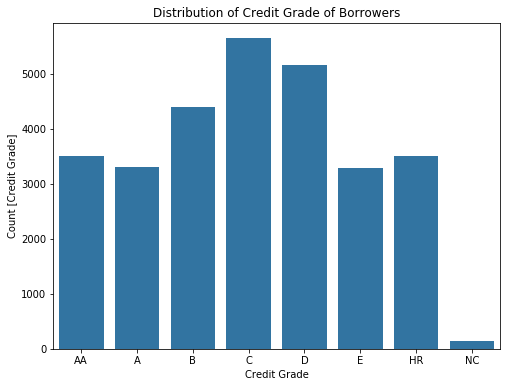

In [22]:
# let's visualize the loan ratings to see how they're distributed across the dataset.
# Here, we're going to use the CreditGrade and ProsperRating (Alpha) columns to answer our question..

plt.figure(figsize=(8,6))
grade_order = ['AA', 'A', 'B','C','D','E' ,'HR','NC']
sns.countplot(data=df, x='CreditGrade', color=base_color, order=grade_order);
plt.title('Distribution of Credit Grade of Borrowers');
plt.ylabel('Count [Credit Grade]');
plt.xlabel('Credit Grade');


Most borrowers pre - 2009 had credit ratings of C and D. Note that we removed NA’s from the graph because essentially NaN’s in the Credit Grade variable correspond to borrowers after July 2009.

As for the borrowers after July 2009 we are going to use the ProsperRating (Alpha) variable. The ProsperRating is a proprietary system developed by PROSPER after the SEC cease that “allows potential investors to easily consider a loan application’s level of risk because the rating represents an estimated average annualized loss rate range to the investor.” So it seems reasonable to use it for measuring the credit risk of each borrower as it fulfils the same role as the Credit Grade variable. Going forward(in my multivariate exploration), I'll feature engineer a new column which uses CreditGrade and ProsperRating to populate missing ratings.

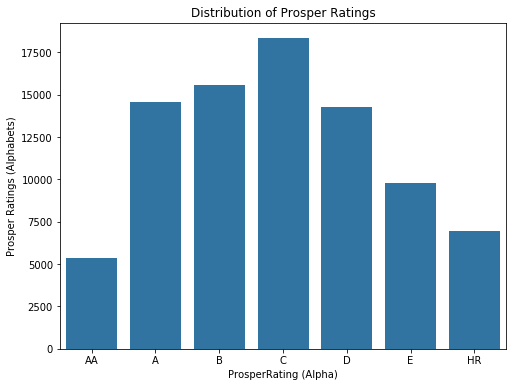

In [23]:
# plot for ProsperRating (Alpha) column

plt.figure(figsize=(8,6))
rating_order = ['AA', 'A', 'B','C','D','E' ,'HR']
sns.countplot(data=df, x='ProsperRating (Alpha)', color=base_color, order=rating_order);
plt.title('Distribution of Prosper Ratings');
plt.ylabel('Count [Borrower Rating]');
plt.ylabel('Prosper Ratings (Alphabets)');


Post 2009, most of the borrowers have had ratings of B and C, with very few borrowers ahieving the rating of AA.

#### What are some of the most Popular reasons for taking loan?

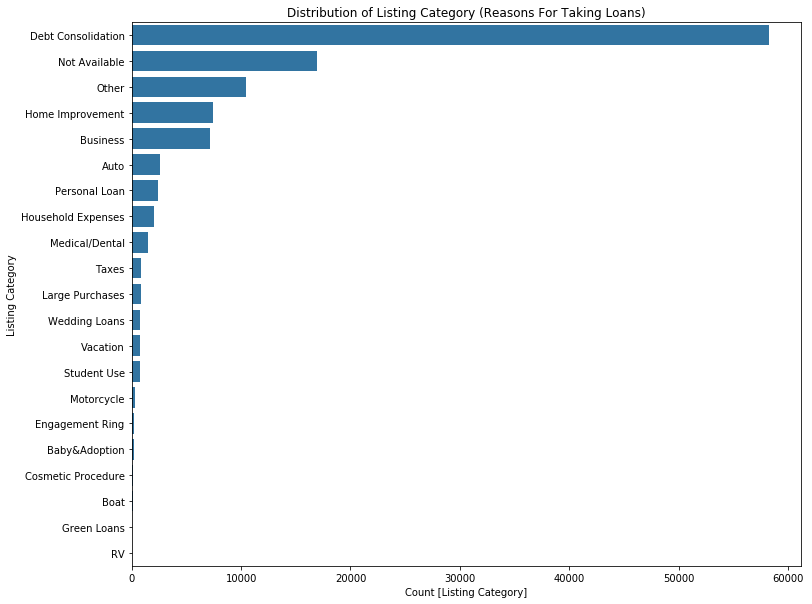

In [24]:
# visualizing the reasons for taking loans

plt.figure(figsize=(12,10))
ListingCategory_ord = df['ListingCategory'].value_counts().index
sns.countplot(data=df, y='ListingCategory', color=base_color, order=ListingCategory_ord);
plt.title('Distribution of Listing Category (Reasons For Taking Loans)');
plt.xlabel('Count [Listing Category]');
plt.ylabel('Listing Category');

Most people take loan to consolidate debts.Poeple also do not disclose the reason for taking the loan which comes as the second most popular option for borrowers. There are other unknown reasons why  people take loan as well and this is the third most popular choice of option for borrower when filing for loans. The fourth and fifth most popular choices of options are that, Some borrowers also take loans to do business and to also for Home Improvement.

#### Which state does most borrowers come from?

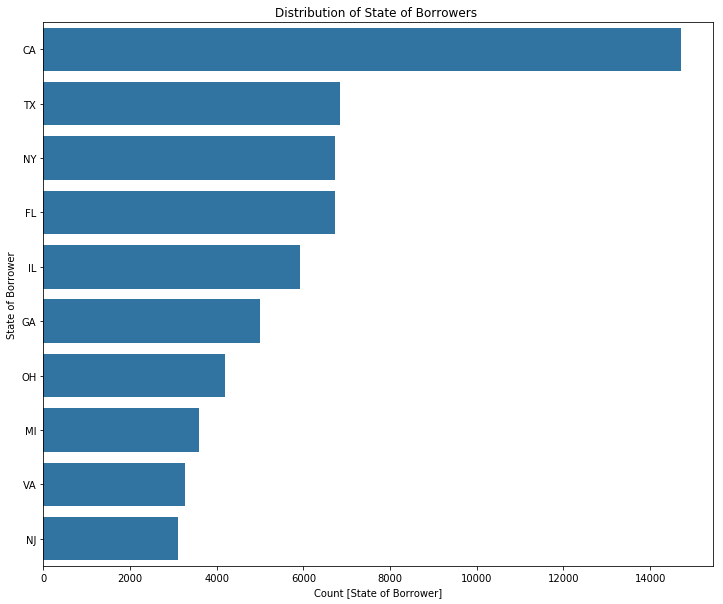

In [25]:
# let's visualize the state where borrowers are coming from the most..

plt.figure(figsize=(12,10))
borrowerstate_ord = df['BorrowerState'].value_counts().index
sns.countplot(data=df, y='BorrowerState', color=base_color, order=borrowerstate_ord[:10]);
plt.title('Distribution of State of Borrowers ');
plt.xlabel('Count [State of Borrower]');
plt.ylabel('State of Borrower');

As seen above, most of the borrowers are coming from California. Texas, New York, Florida, Illinois and Georgia makes the top five(5) States that most borrowers come from.

#### What is the occupation of borrowers?

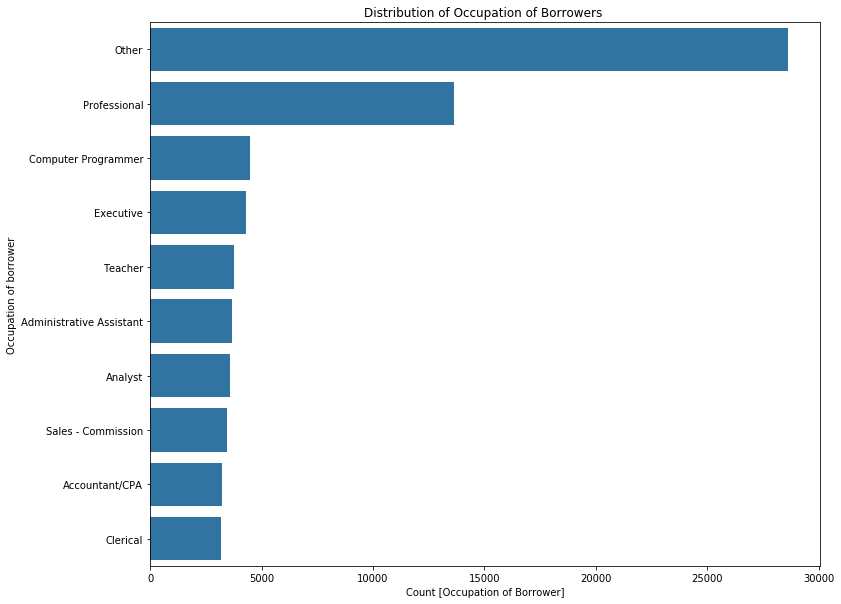

In [26]:
# let's visualize the state where borrowers are coming from the most..

plt.figure(figsize=(12,10))
occupation_ord = df['Occupation'].value_counts().index
sns.countplot(data=df, y='Occupation', color=base_color, order=occupation_ord[:10]);
plt.title('Distribution of Occupation of Borrowers ');
plt.xlabel('Count [Occupation of Borrower]');
plt.ylabel('Occupation of borrower');

Most of the borrowers are Professional workers with the second most popular occupation of borrowers being `Computer Programmers`. Executives, Teachers, Administrative Assistants, Analysts, Sales -Commission, Accountants/CPA and people doing clerical jobs making the cut for the top ten occupations of loan borrowers

#### What is the employment status of borrowers?

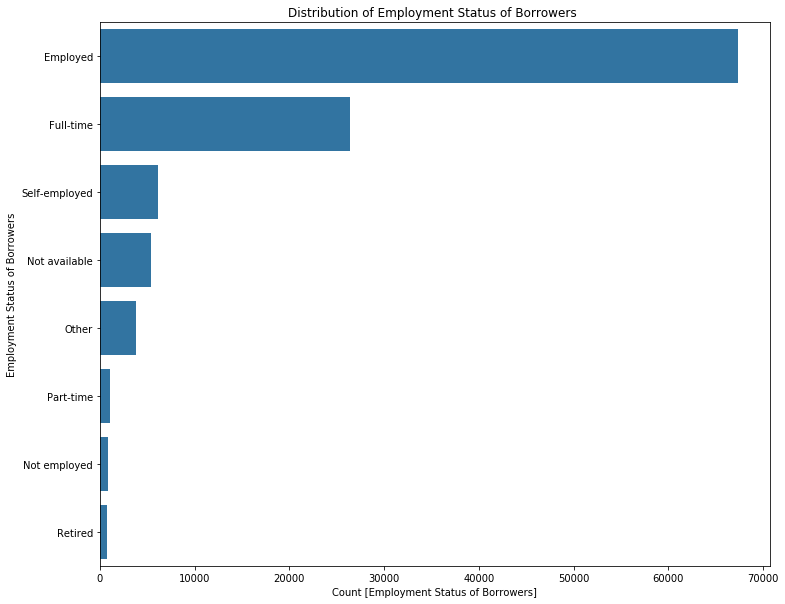

In [27]:
plt.figure(figsize=(12,10))
empstatus_ord = df['EmploymentStatus'].value_counts().index
sns.countplot(data=df, y='EmploymentStatus', color=base_color, order=empstatus_ord);
plt.title('Distribution of Employment Status of Borrowers ');
plt.xlabel('Count [Employment Status of Borrowers]');
plt.ylabel('Employment Status of Borrowers');

Most of the borrowers are Employed, with the second most common employment status being `Full time` employment.

#### How many of the borrowers are Home owners?

In [28]:
homeowner = df.IsBorrowerHomeowner.value_counts()
homeowner

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

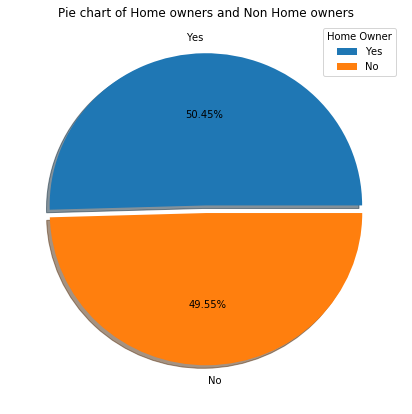

In [29]:
plt.figure(figsize=(7,7))
colors = sns.color_palette()[:2]
labels = ['Yes', 'No']
plt.pie(homeowner, labels = labels, colors=colors, autopct='%.2f%%', explode=[0.05,0], shadow=True);
plt.legend(title='Home Owner');
plt.title('Pie chart of Home owners and Non Home owners');

`50.45%` of the borrowers (57478) are home owners whiles `49.55%` (56459) are not home owners. Home owner are slightly ahead of non home owners.

#### How many of the borrowers are a Group?

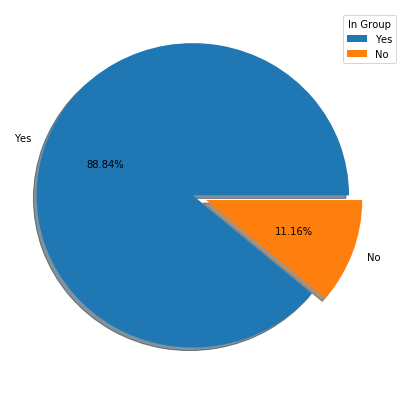

In [30]:
plt.figure(figsize=(7,7))
colors = sns.color_palette()[:2]
labels = ['Yes', 'No']
in_group = df.CurrentlyInGroup.value_counts()
plt.pie(in_group, labels = labels, colors=colors, autopct='%.2f%%', explode=[0.09,0], shadow=True);
plt.legend(title='In Group');

`88.84%` of the borrowers belong to groups.

#### What is the distribution of delinquencies?

In [31]:
df['CurrentDelinquencies'].value_counts()[10]

212

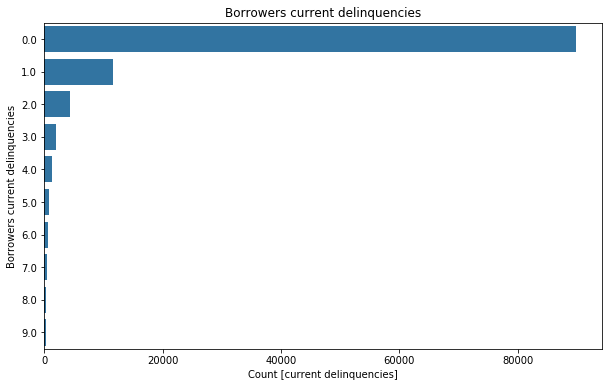

In [32]:
# visualizing Borrowers current delinquencies on the loans
# since Currentdelinquencies are discrete in nature, i'll use barchart for plotting.


num_bars = df['CurrentDelinquencies'].value_counts().index
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='CurrentDelinquencies', color=base_color, order=num_bars[:10]);
plt.title('Borrowers current delinquencies');
plt.ylabel('Borrowers current delinquencies');
plt.xlabel('Count [current delinquencies]');

Most of the borrowers have no delinquencies. Few of the borrowers have delinquencies of 1,2,3,4 and 5, with very few having some outrageous number of delinquencies.

#### What is the income range of borrowers

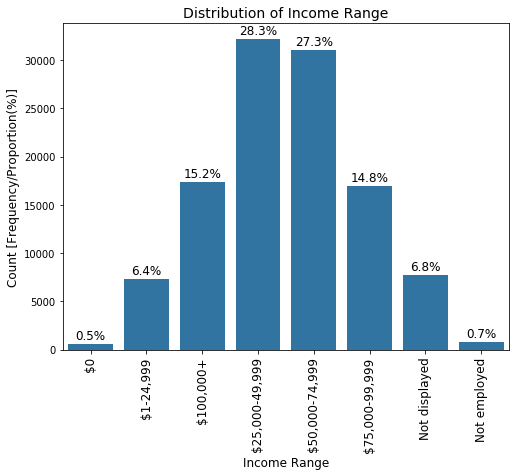

In [33]:
# visualize incomeRange feature..

n_terms = df['IncomeRange'].value_counts().sum()
term_counts = df['IncomeRange'].value_counts()


plt.figure(figsize=(8,6))
sns.countplot(data=df, x='IncomeRange', color=base_color)
plt.ylabel('Count [Frequency/Proportion(%)]', fontsize=12);
plt.xlabel('Income Range', fontsize=12);
plt.title('Distribution of Income Range', fontsize=14)
# get the current tick locations and labels
locs, labels = plt.xticks(fontsize=12, rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = term_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_terms)

    # print the annotation just below the top of the bar
    plt.text(loc, count+500, pct_string, ha = 'center', color = 'black', fontsize=12)

Most of the borrowers had their income ranging from USD 25000 - USD 49999. Followed by those with income ranging from USD 50000  - USD 74999. 15.2% of borrowers have their income to be USD 100000 plus whereas 14.8% of borrowers had USD 75000-$99999 income range.

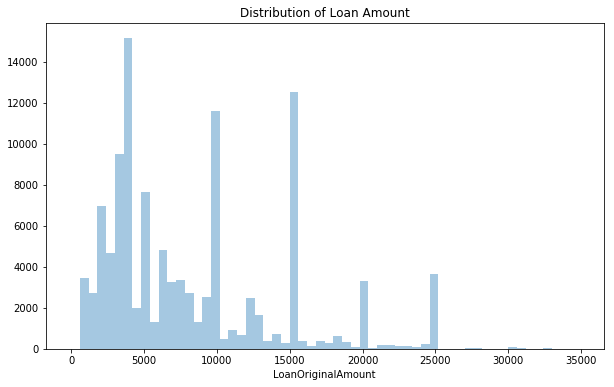

In [34]:
# let's visualize the loan amount..

plt.figure(figsize=(10,6))
binsize = np.arange(0, df['LoanOriginalAmount'].max(), 600)
sns.distplot(df['LoanOriginalAmount'],bins=binsize, color=base_color, kde=False);
plt.title('Distribution of Loan Amount');

Loan amount seem to have multiple points of variations. It has a multimodal distribution, where it peaks at 5000, 10000, 15000, 20000, 25000 and the major peak occuring at $4000

### What is the structure of your dataset?

> As it was mentioned in the beginning of this project the data set contains 113.937 loans and 81 variables, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, the latest payment information among others.


### What is/are the main feature(s) of interest in your dataset?

> I'm much interested in unraveling the features/variables that are best predictors/determinants of an individual's Loan status and Prosper Score an. In other words, i would want to investigate the dataset to see which features influence an individual's loan status and Prosper Score. 
- LoanStatus
- ProsperScore

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - Loan Term (in months)             -          (categorical variable, 12,36,60 months)<br>
- Interest Rate on the Loan          -       Numeric variable(float)<br>
- Credit Grade of the loan            -          (categorical variable, AA - HR, where NC is for No Credit)<br>
- Prosper Rating of the loan         -          (categorical variable, AA - HR)<br>
- Category(Purpose) of the Loan      -        (categorical variable, 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans)<br>
- State of Borrower       -         string format<br>
- Occupation of Borrower         -          (nominal)<br>
- Borrower's Employment Status       -      (categorical variable, )<br>
- Is Borrower a Home owner     -     (boolean variable)<br>
- Is borrower Currently In Group       -      (boolean variable)<br>
- Borrower's Current Delinquencies    -     Numeric variable(int)<br>
- Income Range of borrower       -           (categorical variable)<br>
- Loan Amount                   -            numeric (float)
- Does borrower have Verifiable source of Income    -  (boolean variable)<br>
- Recommendations      -       Numeric variable(int64) <br>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - It was unusual to see Computer programmers being in the top five most common occupations of loan borrowers because it is known worlwide that people in computer programming make a lot of money in their career. The interest rate feature did not have a single peak. There was different peaks at different points with some of them located at the 0.15 and 0.32 regions. Most of the borrowers who took loans had a credit rating of C and D, that is before july 2009 whereas after 2009 the most common rating found was B and C ratings. Also, while some borrowers decided not to disclose their reasoning behind their borrow, Debt consolidation, Business, Home Improvement were among the top 5 reasons for borrowing. It was noticed thatmost borrowers come from califonia and are most being Employed and working as professional worker, computer programmer, Executives, Teachers, Administrative assistants/CPA, Analysts and so on.  The percentage of borrowers who were home owners were slightly above 50% leaving the rest who are not home owners. Also, very few(11.16%) of the borrowers were identified to not belong to a group. Most of the borrower also have not had a delinquency before but some of them had delinquencies ranging from 1-35. It surprised me to see that, some people have records of delinquencies ranging from 40-83. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- Changed data types of some of the features from strings(object data types) to categorical data type for easy plotting and analysis. Features such as IncomeRange, EmploymentStatus, ListingCategory and Term had their data types converted to categorical.
- I also replaced the ListingCategory with their actual category as stated in the variable definition file.

## Bivariate Exploration

What is the interest rate on loans for the various groups of income ranges?

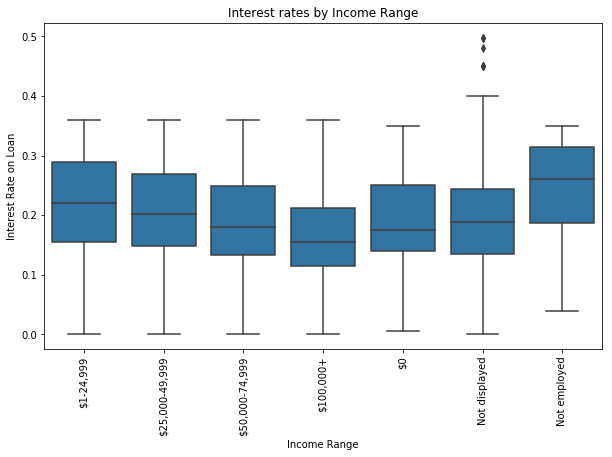

In [35]:
# let's investigate the relation between interest rate and income range
plt.figure(figsize=(10,6))
rate_order = ['$1-24,999','$25,000-49,999','$50,000-74,999','$100,000+','$0','Not displayed', 'Not employed']
sns.boxplot(x=df['IncomeRange'], y=df['BorrowerRate'], color=base_color, order=rate_order)
plt.title('Interest rates by Income Range')
plt.ylabel('Interest Rate on Loan');
plt.xlabel('Income Range');
plt.xticks(rotation=90);

There seems to be a high interest rate on loans taken by borrowers who are not employed, these are outliers and the highest interest rate on a loan is 40%. This could mean that, Prosper loans were taking some kind of precautions when given out loans to people in such status. They wanted to make more money in a shortwhile incase those people are not able to pay up to the end of the deal. There seems to be some kind of loss recovery plan for prosper loans for these kind of borrowers. Other than that, there exists a trend such that income range increases with decreasing interest rate. So the more money a borrower earns, the lower the interest rate on their loan with the exception of those in the `$0`, `Not employed` and `Not displayed` range. Let's visualize the trend between the income range and interest rate for clarity sake.

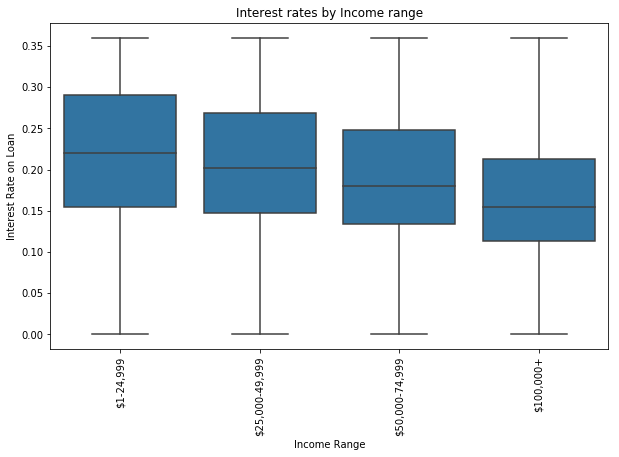

In [36]:
plt.figure(figsize=(10,6))
rate_order = ['$1-24,999','$25,000-49,999','$50,000-74,999','$100,000+']
sns.boxplot(x=df['IncomeRange'], y=df['BorrowerRate'], color=base_color, order=rate_order)
plt.title('Interest rates by Income range')
plt.ylabel('Interest Rate on Loan');
plt.xlabel('Income Range');
plt.xticks(rotation=90);

The trend is clear here. It can be seen that as the income range increases the interest rate decreases. 

#### Is there a relationship between income range and loan amount?

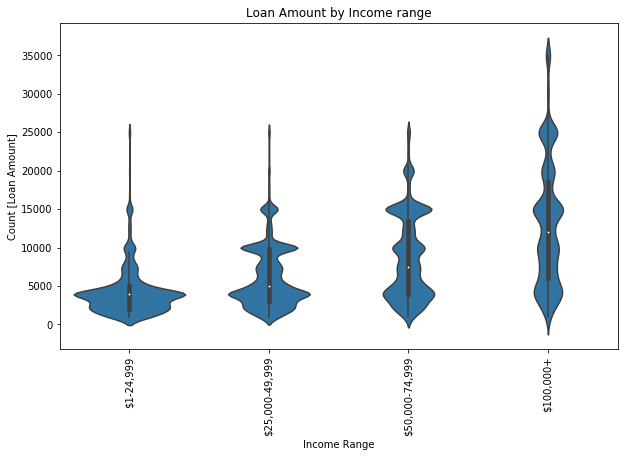

In [37]:
plt.figure(figsize=(10,6))
rate_order = ['$1-24,999','$25,000-49,999','$50,000-74,999','$100,000+']
sns.violinplot(x=df['IncomeRange'], y=df['LoanOriginalAmount'], color=base_color, order=rate_order, ci=None)
plt.title('Loan Amount by Income range')
plt.ylabel('Count [Loan Amount]');
plt.xlabel('Income Range');
plt.xticks(rotation=90);

This is clear, the higher the borrowers income range the higher the amount of loan they take and it makes sense. Also most borrowers take loan amounts within their income range and that perfectly understandable.

#### What is the relationship between interest rate and the loan amount?

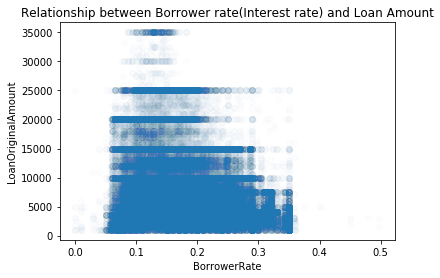

In [38]:
# visualising the relationship between the interest rate and the loan amount

sns.regplot(data=df, x="BorrowerRate", y="LoanOriginalAmount", fit_reg=False, scatter_kws={'alpha':0.01});
plt.title('Relationship between Borrower rate(Interest rate) and Loan Amount');

Someway somehow, higher loan amounts tends to have lesser interest rate 

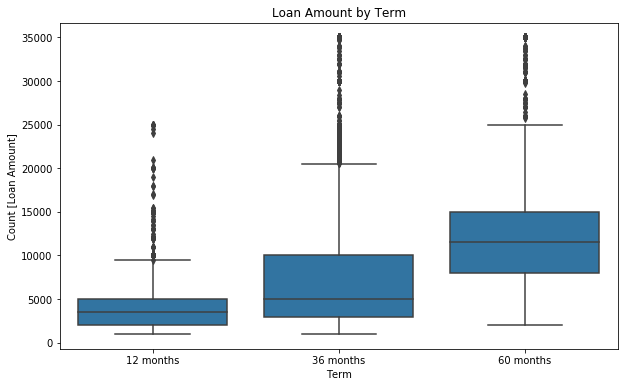

In [39]:
# let's visualize the loan amount and term.

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Term'], y=df['LoanOriginalAmount'], color=base_color)
plt.title('Loan Amount by Term')
plt.ylabel('Count [Loan Amount]');
plt.xlabel('Term');
# plt.xticks(rotation=90);

Large amount of loans tend to have longer loan term.

### Now let's look into the default of loan and investigate if there are any relationship with the other features.

#### For us to be able to perform analysis on the features of interest, i would have to take a subset of the dataset where the loan status of borrowers are charged-off, defaulted and completed. Since we want to create some sort of business value with this analysis, we have to investigate the feature behaviors that causes a borrower to default or to completely pay off.

In [40]:
# let's get the subset containing defaulters and non defaulters

default_df = df[ (df['LoanStatus'] == 'Completed') | (df['LoanStatus'] == 'Chargedoff') | (df['LoanStatus'] == 'Defaulted') ]

In [41]:
# create a new feature to hold the status whether Default or Not. 
# This new feature will take on Yes or No depending on the value of the LoanStatus
# Completed = No, Defaulted/Chargedoff = Yes

default_df['DefaultStatus'] = default_df['LoanStatus'].map({'Completed':'No', 'Chargedoff':'Yes', 'Defaulted':'Yes'})

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [42]:
default_df['DefaultStatus'].value_counts()

No     38074
Yes    17010
Name: DefaultStatus, dtype: int64

Now we have created a new dataset that contains those who defaulted and those who did not. We can continue to explore their characteristics.

#### What is the relationship between income range and default status?

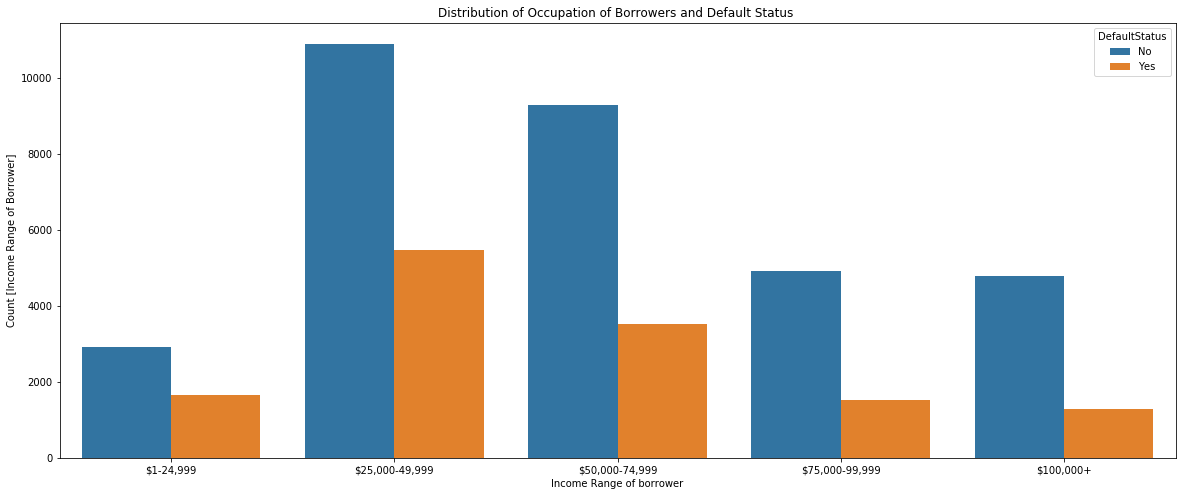

In [43]:
# income range and default status..

plt.figure(figsize=(20,8))
range_order = ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.countplot(data = default_df, x = 'IncomeRange', hue = 'DefaultStatus', order=range_order)
plt.title('Distribution of Occupation of Borrowers and Default Status ');
plt.ylabel('Count [Income Range of Borrower]');
plt.xlabel('Income Range of borrower');

Most of the defaulters are coming from the the income range of 25,000-49,999, and this makes sense considering the fact that their number is huge in the dataset.

#### Does interest rate have any influence on whether a borrower will default?

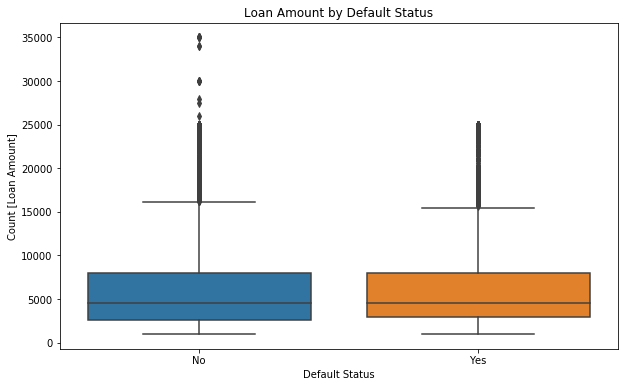

In [44]:
# visualise the interest rate of defaulters and non defaulters..


plt.figure(figsize=(10,6))
colors = sns.color_palette()[:2]
sns.boxplot(x=default_df['DefaultStatus'], y=default_df['LoanOriginalAmount'])
plt.title('Loan Amount by Default Status')
plt.ylabel('Count [Loan Amount]');
plt.xlabel('Default Status');
plt.legend(title='Default');

There is no significant relationship between the loan amount of those who defaulted and those who did not. With non defaulters having some few number of outrageous values beyound $`30000` whereas non of the defaulters borrowed up to $`30000`. Both have a median loan amount of $`5000`.

#### What is the default rate among various occupations?

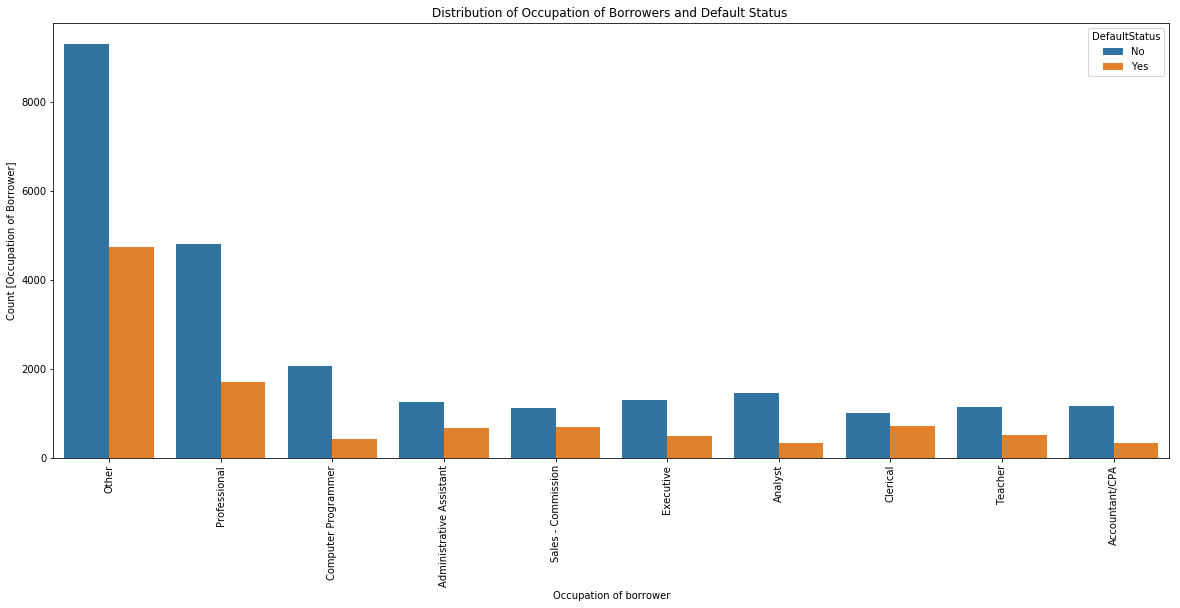

In [45]:
plt.figure(figsize=(20,8))
def_order = default_df.Occupation.value_counts().index
sns.countplot(data = default_df, x = 'Occupation', hue = 'DefaultStatus', order=def_order[:10])
plt.title('Distribution of Occupation of Borrowers and Default Status ');
plt.ylabel('Count [Occupation of Borrower]');
plt.xlabel('Occupation of borrower');
plt.xticks(rotation=90);

The number of defaulters are higher in Professional worker as compared to the rest of the occupations. But this may be due to the fact that there are more Professional workers as compared to the rest of the Occupations and therefore we can't make any logical conclusion about this.

#### What is the relationship between the amount of loan and the credit grade or prosper rating?

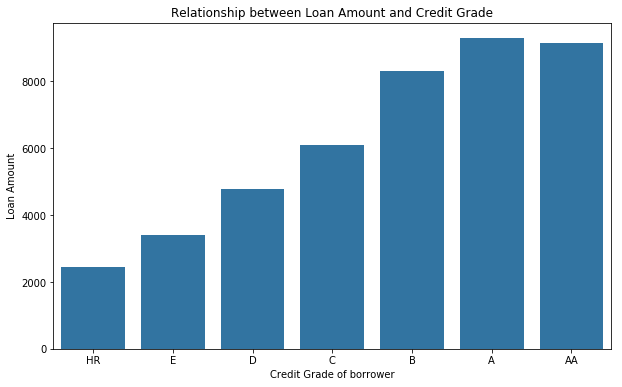

In [46]:
plt.figure(figsize=(10,6))
grade_order = ['HR','E','D','C','B','A','AA']
sns.barplot(data = df, y = 'LoanOriginalAmount', x = 'CreditGrade', color=base_color, order=grade_order, ci=None)
plt.title('Relationship between Loan Amount and Credit Grade');
plt.xlabel('Credit Grade of borrower');
plt.ylabel('Loan Amount');

It can be seen that, the higher the credit grade the larger the amount of loan taken and people with credit grade of A are slightly ahead of those with grade AA where the trend is discontinued. Other than grade `AA`, the higher your credit grade moving from `HR` to `A`, the larger the amount of loan you're given or entitled to take. This is the behaviour observed for borrowers before 2009.

Let's check the relationship between loan amount and prosper rating for borrowers after 2009.

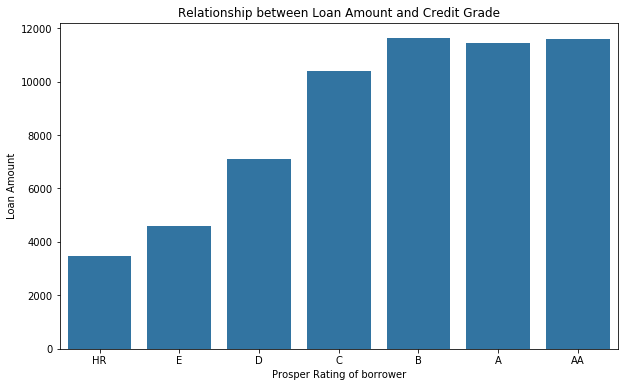

In [47]:
plt.figure(figsize=(10,6))
grade_order = ['HR','E','D','C','B','A','AA']
sns.barplot(data = df, y = 'LoanOriginalAmount', x = 'ProsperRating (Alpha)', color=base_color, order=grade_order, ci=None)
plt.title('Relationship between Loan Amount and Credit Grade');
plt.xlabel('Prosper Rating of borrower');
plt.ylabel('Loan Amount');

After 2009, borrowers who had ratings of `AA`, `B` and `A` take larger loan amount than the other groups. There is a similar trend in the pre-2009 borrowers where good credit grades are associated with large amount of loans. But one thing realised is that, the amounts of loans taken by borrowers are much higher in post 2009 as compared to that of pre-2009. In post 2009 loans are above USD 10,000 whiles its below this threshold in pre-2009.

    Let's compare the default rate for pre-2009 and post-2009, using the credit grade (pre-2009) and the Prosper rating (post-2009)

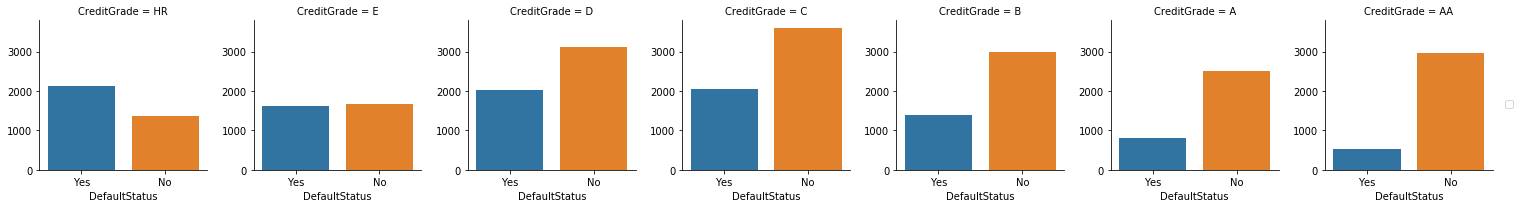

In [48]:
# let's visualize the number of defaulters for each of the grade groups

colors = sns.color_palette()[:2]
g = sns.FacetGrid(default_df,
            col='CreditGrade', col_order=['HR','E','D','C','B','A','AA'],
            sharex=True,
            sharey=True);
g = g.map(sns.countplot, "DefaultStatus", 
          hue_order=np.unique(default_df["DefaultStatus"]), 
          order=["Yes", "No"], 
          palette=colors)
g.add_legend();


It can be seen that most of the defaulters are coming with a credit grade of `HR`, that is the least performing grade, followed by those with grades `C` and `D`

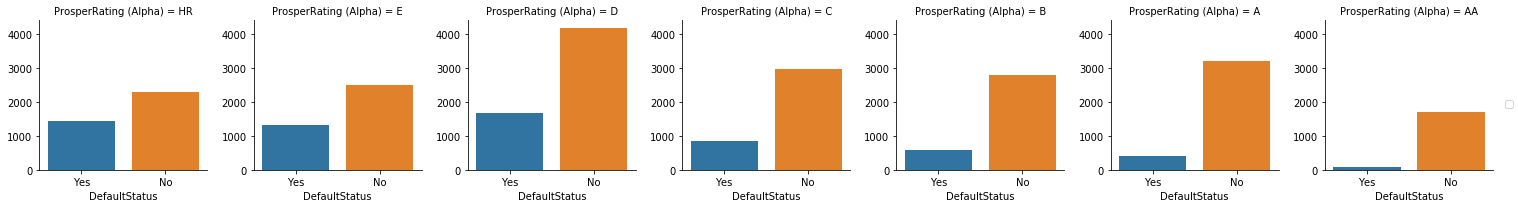

In [49]:
# visualize the ratings of the borrowers after 2009 since prosper rating are only populated for entries in 2009.

g = sns.FacetGrid(default_df,
            col='ProsperRating (Alpha)', col_order=['HR','E','D','C','B','A','AA'],
            sharex=True,
            sharey=True);
g = g.map(sns.countplot, "DefaultStatus", 
          hue_order=np.unique(default_df["DefaultStatus"]), 
          order=["Yes", "No"], 
          palette=colors)
g.add_legend();
# plt.figure(figsize=(10,10));

Here, most of the defaulters have grade of `D` not the same as compared to the pre-2009 where most of the defaulters had grade/rating of `HR`. Rating of AA had the least number of defaulters

Let's visualize the strength of the relationships between those in group and not  in group, emplyment status and default status

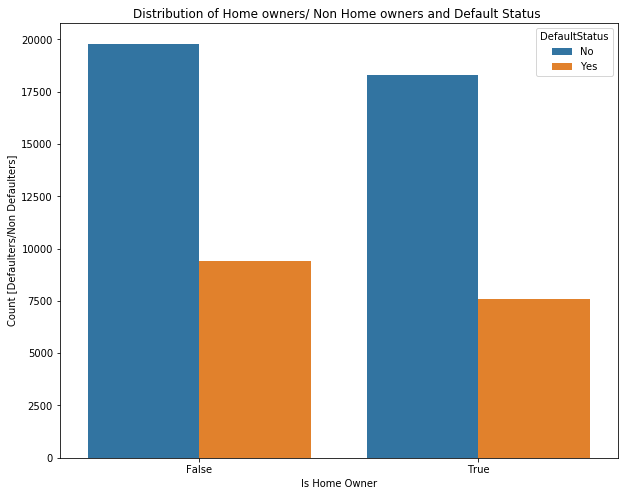

In [50]:
plt.figure(figsize=(10,8))
def_order = default_df.IsBorrowerHomeowner.value_counts().index
sns.countplot(data = default_df, x = 'IsBorrowerHomeowner', hue = 'DefaultStatus')
plt.title('Distribution of Home owners/ Non Home owners and Default Status ');
plt.ylabel('Count [Defaulters/Non Defaulters]');
plt.xlabel('Is Home Owner');

Comparing home owners to those who aren't home owners, it can be seen that those who are not home owner have relatively higher defaulters. This could be attributed to that fact that there is slightly more number of non home owner as compared to home owners. What we get from the above plot is that home ownership is most likely not a strict requirement for a loan, because obviously the number of non home owner are more than home owners.

Let's checkout the prosper score feature with other features.

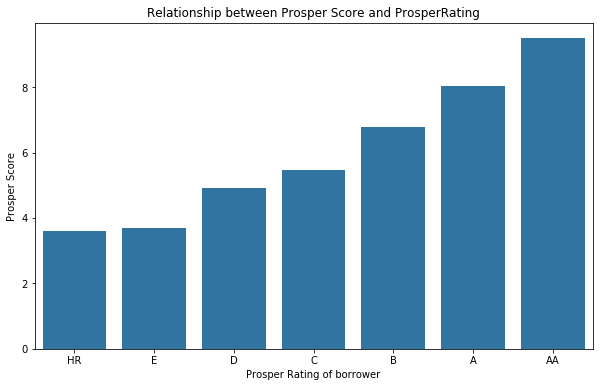

In [51]:
plt.figure(figsize=(10,6))
grade_order = ['HR','E','D','C','B','A','AA']
sns.barplot(data = df, y = 'ProsperScore', x = 'ProsperRating (Alpha)', color=base_color, order=grade_order, ci=None)
plt.title('Relationship between Prosper Score and ProsperRating');
plt.xlabel('Prosper Rating of borrower');
plt.ylabel('Prosper Score');

What we can draw from the above graph is that, high prosper score is associated with high credit grade.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The number of borrowers who defaulted reduced drastically after 2009. Also, high credit grades are associated with high prosper score. Most of the defaulters have grade of `D` not the same as compared to the pre-2009 where most of the defaulters had grade/rating of `HR`. Rating of AA had the least number of defaulters. Those who are not home owners had a higher number of defualters as compared home owners taking into consideration the higher number of non home owners. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>I realised that, borrowers who are not employed have much higher interest rate on their loans as compared to the those employed. Also, loan amount increased as we move from the least grade/rating to a much better grade/rating. Borrowers with high income ranges also tend to borrow large amount of loans. It was also interesting to see that borrowers with the least quality grade tend borrowe less amount of money. After 2009, borrowers who had ratings of `AA`, `B` and `A` take larger loan amount than the other groups. There is a similar trend in the pre-2009 borrowers where good credit grades are associated with large amount of loans. But one thing realised is that, the amounts of loans taken by borrowers are much higher in post 2009 as compared to that of pre-2009. In post 2009, loans are above USD 10,000 whiles its below this threshold in pre-2009.

## Multivariate Exploration

#### What is the performance in loan default?

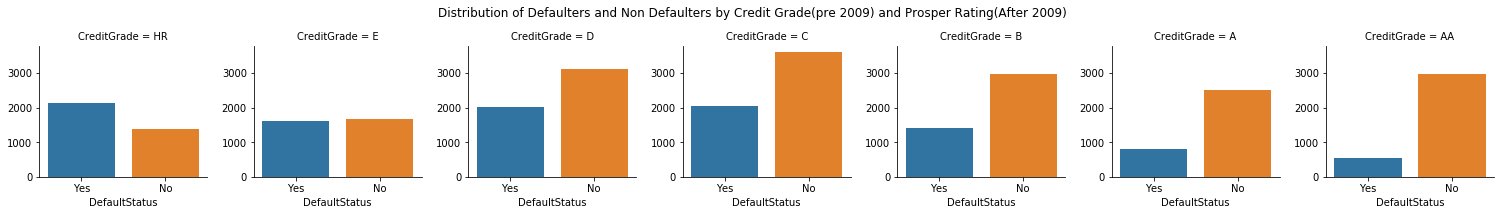

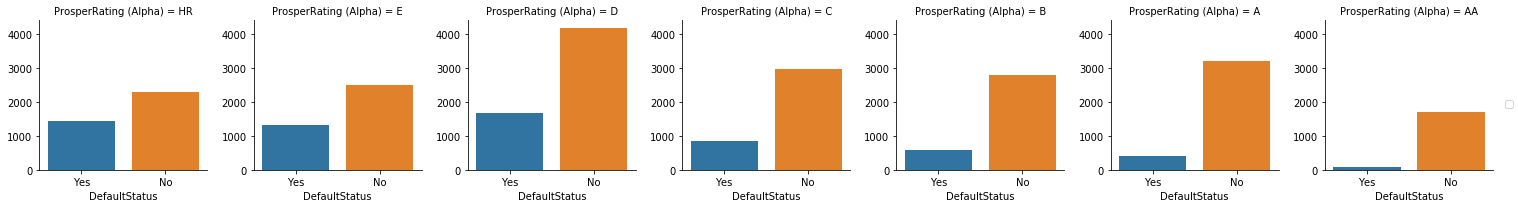

In [77]:
# do a facetgrid using the CreditGrade and ProsperRating
# since CreditGrade is for pre-2009 and ProsperRating is post-2009, 
# we can use these columns to evaluate the performance of loans.


colors = sns.color_palette()[:2]
plt.figure(figsize=(15,10))

g = sns.FacetGrid(default_df,
            col='CreditGrade', col_order=['HR','E','D','C','B','A','AA'],
            sharex=True,
            sharey=True)
g = g.map(sns.countplot, "DefaultStatus", 
          hue_order=np.unique(default_df["DefaultStatus"]), 
          order=["Yes", "No"], 
          palette=colors)
# g.add_legend();

g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
g.fig.suptitle('Distribution of Defaulters and Non Defaulters by Credit Grade(pre 2009) and Prosper Rating(After 2009)')

p = sns.FacetGrid(default_df,
            col='ProsperRating (Alpha)', col_order=['HR','E','D','C','B','A','AA'],
            sharex=True,
            sharey=True);
p = p.map(sns.countplot, "DefaultStatus", 
          hue_order=np.unique(default_df["DefaultStatus"]), 
          order=["Yes", "No"], 
          palette=colors);
p.add_legend();
plt.show()

Performance of borrowers with grade `HR` (lowest grade) have increased tremendously. Comparing the pre-2009 with post-2009, it can be seen that the number of defaulters have dropped significantly. In pre-2009, number of defaulters exceeded the number of non defaulters whereas in post-2009, the number of defaulters is less than the number of non defaulters and this shows an improvement in borrowers with grade `HR`. Also, there is performance improvement in those with grade/rating of `AA` since there is drastic reduce in the number of defaulters over the years. In all, there is a decrease in the number of defaulters. This could mean that the company's rating systems was made much better after 2009 onwards.

#### plot correlation matrix to visualize the relationship between loan amount, delinquencies, recommedations and prosper score to help visualize their relationship.

In [53]:
part_df = df[['LoanOriginalAmount','BorrowerRate','CurrentDelinquencies','Recommendations','ProsperScore']]

Text(0.5,1,'Heatmap of correlation between Prosper Score and Recommendations, Interest Rate, Delinquencies, Loan Amount')

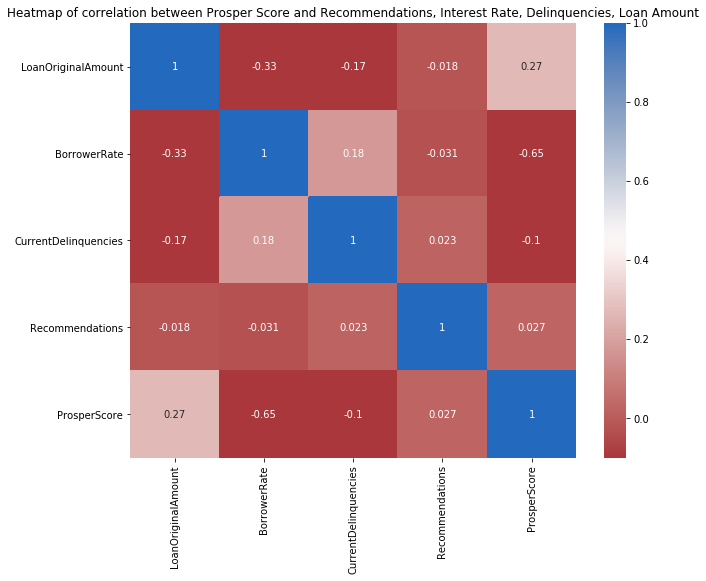

In [54]:

plt.figure(figsize=(10,8))
sns.heatmap(part_df.corr(), annot=True, cmap='vlag_r', vmax=1, vmin=-0.1);
plt.title('Heatmap of correlation between Prosper Score and Recommendations, Interest Rate, Delinquencies, Loan Amount')

From the above graph, there is a strong negative correlation between prosper score and the interest rate which could imply that when there is an increase in prosper score, there is a corresponding decrease in interest rate and vice versa. Whereas there exist a weak positive relationship between prosper score and loan amount and this implies that when there is an increase in prosper score, there is a slight corresponding increase in the loan amount and also when there is a increase in the loan amount there is a slight increase in the prosper score although this relationship is not that strong, it is worth stating it. Meaning borrowers with good prosper scores tend to borrow slightly high amount of loans. Relationship between prosper score and number of recommendations is not really strong and changes in either of them may not lead to a significant change in the either of them as well. The relation between number of recommendations and the current delinquencies are not very good to talk about. Also there exists a weak negative relationship between current delinquencies and the prosper score, and so a change in one could probably lead to a less significant change in the other in the opposite direction that is if prosper score is higher it could also lead to a slight decrease in the current delinqencies and this makes sense although the change could go unnoticed.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  Borrower rate (interest rate), current delinquencies and recommendations all seemed to have had a negative correlation with the prosper score. All of the relationships seen above were expected to be exact. Although throughout the analysis there seemed to be a potential of the credit grade and the prosper rating features to exhibit some sort of strong relationship if combined but due to time contraints wasn't explored further.

### Were there any interesting or surprising interactions between features?

> It was interesting to realise that there exist a strong negative relationship between Borrower rate (interest rate) and prosper score as well a negative correlation with number of recommendations. Also, there is a weak positive correlation between the borrower rate(interest rate) and current delinquecies which is very interesting to spot.

## Conclusions
>It was an eye opening experience analyzing this dataset. It was very challenging and full of knowledge as i got exposed to som much that it has made my analysis strong. So much could have been done if not for time constraints.
This dataset contained data about loans taken by borrowers on the Prosper loans platform from 2005 to 2014. It had data points such as the borrowers income range, the interest rate on the loan, the amount of loan taken, delinquencies, group data whether or not the borrower is in a group, whether the borrower is a home owner or not, rating/grade and data on scores such as credit scores and prosper scores. while there were obvious relationship/behaviours such as large loans having longer duration to be settled, high loans having less interest rates, borrowers with high quality rating/grade borrowing larger amounts of loans and there were also some interesting insghts found such as significant decrease in the number of defaulter throughout the years moving from 2005 to 2014 considering the two data groups known as pre-2009 and post-2009 for all income ranges, people with high income ranges also borrowing larger amounts of loan.
Whiles working through this dataset, i realised that some of the features are pre 2009 and post 2009. Features such as Prosper rating (alpha) and credit grade could be combined so that we can reduce the number of null values in the dataset and these two could also be combined to enhance each other.